<a href="https://colab.research.google.com/github/nik280/Minor-Project/blob/main/Forecasting_Vegetable_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Forecasting is similar to Regression
# In Regression , both ip and op features are continous
# In Forecasting, we have ip(independent feature) always as date/time
# Prediction wrt date/time

In [ ]:
# http://nhrdf.org/en-us/DateWiseMarketArrivals
import pandas as pd
path = '/content/drive/MyDrive/Python - April/Data Science/tomato_mad_chennai.html'
df = pd.read_html(path)[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,08/Aug/2016,CHENNAI,5400,600,800,750
1,09/Aug/2016,CHENNAI,5070,600,800,700
2,10/Aug/2016,CHENNAI,5260,600,800,700
3,11/Aug/2016,CHENNAI,5070,600,800,700
4,12/Aug/2016,CHENNAI,570,700,800,750
...,...,...,...,...,...,...
1880,18/Jul/2019,MADANAPALLE (AP),4150,1000,3800,2550
1881,20/Jul/2019,MADANAPALLE (AP),4000,1000,3600,2500
1882,30/Jul/2019,MADANAPALLE (AP),4860,800,3400,2800
1883,01/Aug/2019,MADANAPALLE (AP),4800,2000,3480,2800


In [ ]:
df.columns

Index(['Date', 'Market', 'Arrival(q)', 'Price Minimum (Rs/q)',
       'Price Maximum (Rs/q)', 'Modal Price (Rs/q)'],
      dtype='object')

In [ ]:
df['Market'].value_counts()

MADANAPALLE (AP)    1024
CHENNAI              860
Total                  1
Name: Market, dtype: int64

In [ ]:
df.tail()

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
1880,18/Jul/2019,MADANAPALLE (AP),4150,1000,3800,2550
1881,20/Jul/2019,MADANAPALLE (AP),4000,1000,3600,2500
1882,30/Jul/2019,MADANAPALLE (AP),4860,800,3400,2800
1883,01/Aug/2019,MADANAPALLE (AP),4800,2000,3480,2800
1884,NaN,Total,7009151,1472(Avg),1846(Avg),1685(Avg)


In [ ]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
# Removing the missing value
df = df.dropna()
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,08/Aug/2016,CHENNAI,5400,600,800,750
1,09/Aug/2016,CHENNAI,5070,600,800,700
2,10/Aug/2016,CHENNAI,5260,600,800,700
3,11/Aug/2016,CHENNAI,5070,600,800,700
4,12/Aug/2016,CHENNAI,570,700,800,750
...,...,...,...,...,...,...
1879,15/Jul/2019,MADANAPALLE (AP),3670,1000,3800,2500
1880,18/Jul/2019,MADANAPALLE (AP),4150,1000,3800,2550
1881,20/Jul/2019,MADANAPALLE (AP),4000,1000,3600,2500
1882,30/Jul/2019,MADANAPALLE (AP),4860,800,3400,2800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 0 to 1883
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  1884 non-null   object
 1   Market                1884 non-null   object
 2   Arrival(q)            1884 non-null   int64 
 3   Price Minimum (Rs/q)  1884 non-null   object
 4   Price Maximum (Rs/q)  1884 non-null   object
 5   Modal Price (Rs/q)    1884 non-null   object
dtypes: int64(1), object(5)
memory usage: 103.0+ KB


In [ ]:
# Changing the datatype of columns
df['Date'] = pd.to_datetime(df['Date'])
df['Price Minimum (Rs/q)'] = df['Price Minimum (Rs/q)'].astype(int)
df['Price Maximum (Rs/q)'] = df['Price Maximum (Rs/q)'].astype(int)
df['Modal Price (Rs/q)'] = df['Modal Price (Rs/q)'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 0 to 1883
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1884 non-null   datetime64[ns]
 1   Market                1884 non-null   object        
 2   Arrival(q)            1884 non-null   int64         
 3   Price Minimum (Rs/q)  1884 non-null   int64         
 4   Price Maximum (Rs/q)  1884 non-null   int64         
 5   Modal Price (Rs/q)    1884 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 103.0+ KB


In [ ]:
# Renaming the columns
df = df.rename(columns ={df.columns[3]:'min_price',
                         df.columns[4]:'max_price',
                         df.columns[5]:'mode_price'})

In [ ]:
df.columns

Index(['Date', 'Market', 'Arrival(q)', 'min_price', 'max_price', 'mode_price'], dtype='object')

In [ ]:
df_chennai = df[df['Market'] == 'CHENNAI']
df_chennai.shape


(860, 6)

In [ ]:
df_chennai = df[df['Market'] == 'CHENNAI'][0:851]

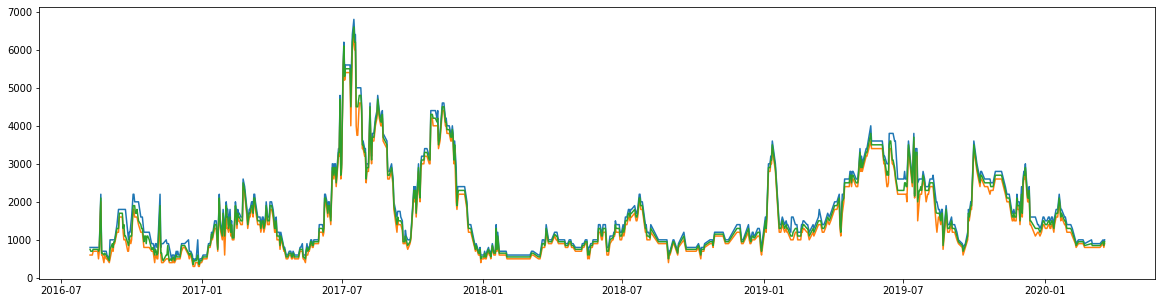

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_chennai['Date'].sort_values(),df_chennai['max_price'])
plt.plot(df_chennai['Date'].sort_values(),df_chennai['min_price'])
plt.plot(df_chennai['Date'].sort_values(),df_chennai['mode_price'])

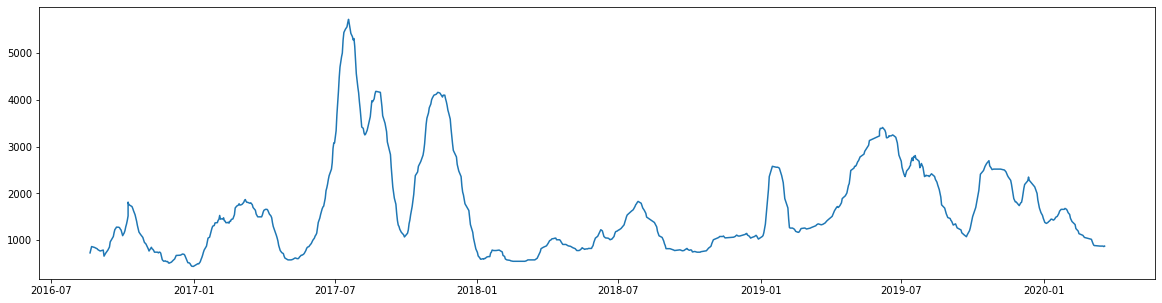

In [ ]:
plt.figure(figsize=(20,5))
#plt.plot(df_chennai['Date'],df_chennai['mode_price'])
plt.plot(df_chennai['Date'],df_chennai['mode_price'].rolling(10).mean())

In [ ]:
df_chennai = df_chennai.rename(columns ={'mode_price':'y','Date':'ds'})

In [ ]:
df_chennai

,ds,Market,Arrival(q),min_price,max_price,y
0,2016-08-08,CHENNAI,5400,600,800,750
1,2016-08-09,CHENNAI,5070,600,800,700
2,2016-08-10,CHENNAI,5260,600,800,700
3,2016-08-11,CHENNAI,5070,600,800,700
4,2016-08-12,CHENNAI,570,700,800,750
...,...,...,...,...,...,...
846,2020-03-07,CHENNAI,5500,800,900,850
847,2020-03-13,CHENNAI,5300,800,900,850
848,2020-03-17,CHENNAI,5700,900,1000,950
849,2020-03-18,CHENNAI,5700,800,900,850


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


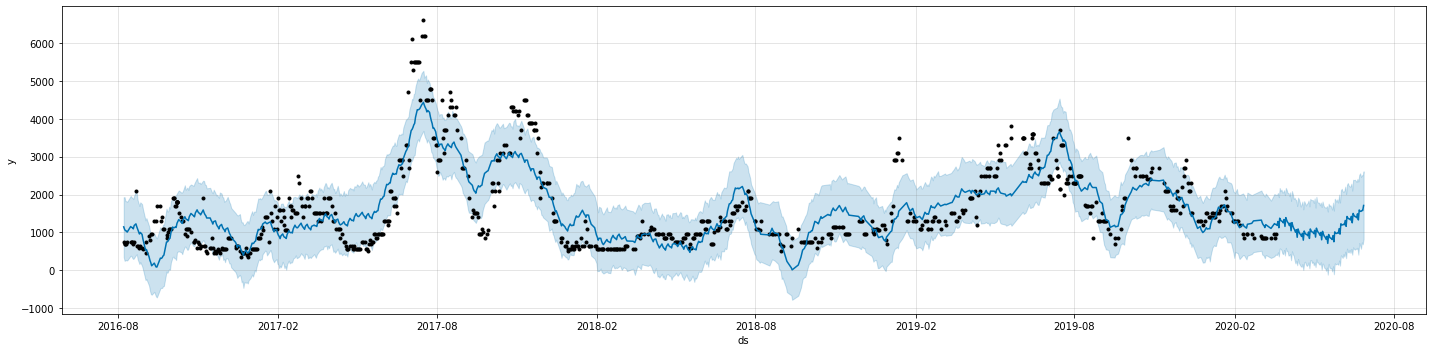

In [ ]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df_chennai)
x = model.make_future_dataframe(periods = 100,freq='D')
forecast = model.predict(x)
df2 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast,figsize=(20,5));